
# Optimization of Fixed Income Portfolios: Applying Portfolio Optimization Techniques

## Overview
Portfolio optimization aims to allocate assets in a way that maximizes returns for a given level of risk. In fixed income, optimization techniques like mean-variance optimization help investors balance yield, duration, and credit risk across various bond holdings.

In this notebook, we will:

- **Understand Portfolio Optimization for Fixed Income**: Explore the basics of mean-variance optimization and its application in fixed income.
- **Download Historical Data**: Use data to analyze risk and returns of different bond ETFs.
- **Example Portfolio Optimization**: Calculate an optimal allocation of bond ETFs based on risk-return characteristics.

Portfolio optimization is a crucial tool for fixed income investors seeking to balance risk and return efficiently.



## 1. Basics of Mean-Variance Optimization in Fixed Income

Mean-variance optimization uses historical returns and volatilities of assets to find the best asset allocation. Key inputs include:

- **Expected Return**: Average return of each bond holding.
- **Volatility**: Standard deviation of returns, representing risk.
- **Correlation**: Relationship between returns of different bonds.

By balancing these inputs, the optimization algorithm determines the allocation that maximizes return for a given level of portfolio risk.



## 2. Downloading Data for Bond ETFs

We’ll use `yfinance` to download historical data for a selection of bond ETFs, including:

- iShares iBoxx $ Investment Grade Corporate Bond ETF (LQD)
- iShares 7-10 Year Treasury Bond ETF (IEF)
- iShares High Yield Corporate Bond ETF (HYG)

These ETFs will form the assets in our portfolio, and we will use their historical returns to construct an optimized portfolio.


In [1]:

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Download historical price data for bond ETFs
tickers = ["LQD", "IEF", "HYG"]
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 252  # Annualized
cov_matrix = returns.cov() * 252         # Annualized

print("Expected Returns:", expected_returns)
print(" Covariance Matrix:", cov_matrix)


[*********************100%***********************]  3 of 3 completed

Expected Returns: Ticker
HYG    0.046898
IEF    0.027246
LQD    0.038190
dtype: float64
 Covariance Matrix: Ticker       HYG       IEF       LQD
Ticker                              
HYG     0.007721 -0.000720  0.002531
IEF    -0.000720  0.004149  0.003199
LQD     0.002531  0.003199  0.005776



## 3. Portfolio Optimization Calculation

We’ll apply mean-variance optimization to calculate an optimal portfolio allocation. This involves:

1. Defining weights for each asset in the portfolio.
2. Calculating the portfolio's expected return and risk (volatility).
3. Finding the weights that maximize the return-to-risk ratio.

### Optimization using Monte Carlo Simulation


Optimal Weights for Maximum Sharpe Ratio Portfolio:
LQD: 46.48%
IEF: 53.35%
HYG: 0.17%


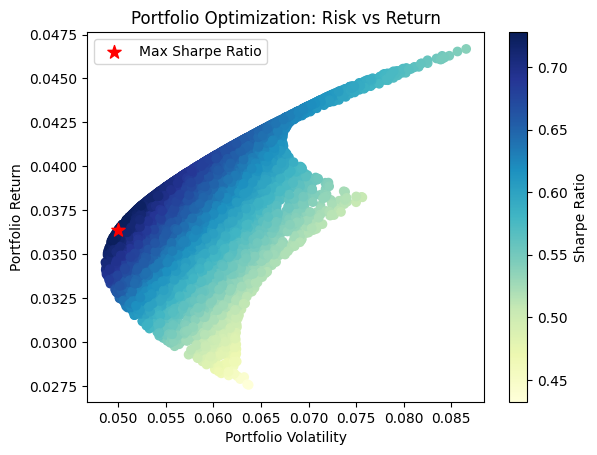

In [2]:

import numpy as np

# Number of portfolios to simulate
num_portfolios = 10000

# Set up arrays to hold results
results = np.zeros((3, num_portfolios))
weight_record = []

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Save weights
    weight_record.append(weights)

    # Calculate portfolio return and volatility
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Store results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = results[0,i] / results[1,i]  # Sharpe ratio

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
optimal_weights = weight_record[max_sharpe_idx]

print("Optimal Weights for Maximum Sharpe Ratio Portfolio:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.2%}")

# Plot the portfolios
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap="YlGnBu", marker="o")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Return")
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c="red", marker="*", s=100, label="Max Sharpe Ratio")
plt.legend()
plt.title("Portfolio Optimization: Risk vs Return")
plt.show()



## Summary

In this notebook, we covered:

- **Basics of Mean-Variance Optimization**: Applying portfolio optimization techniques to fixed income investments.
- **Data Analysis**: Using historical bond ETF data to analyze risk-return characteristics.
- **Portfolio Optimization Calculation**: Identifying an optimal bond allocation based on risk-return profiles.

Optimization techniques help investors balance risk and return effectively in fixed income portfolios.
